In [33]:
#Importing requiered libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("/Users/sachin/Documents/AI filter test/Food_Nutrition_Model/stigler.csv")
print(df.head())
print(df.columns)

                 commodity    unit  price_cents  calories  protein_g  \
0   Wheat Flour (Enriched)  10 lb.         36.0      44.7       1411   
1                 Macaroni   1 lb.         14.1      11.6        418   
2  Wheat Cereal (Enriched)  28 oz.         24.2      11.8        377   
3              Corn Flakes   8 oz.          7.1      11.4        252   
4                Corn Meal   1 lb.          4.6      36.0        897   

   calcium_g  iron_mg  vitamin_a_iu  vitamin_b1_mg  vitamin_b2_mg  niacin_mg  \
0        2.0      365           0.0           55.4           33.3        441   
1        0.7       54           0.0            3.2            1.9         68   
2       14.4      175           0.0           14.4            8.8        114   
3        0.1       56           0.0           13.5            2.3         68   
4        1.7       99          30.9           17.4            7.9        106   

   vitamin_c_mg  
0             0  
1             0  
2             0  
3             

In [35]:
#makes a copy of the dataframe including only the 4 columns and saves it into features(only numerical data is extracted)
features = df[['calories' , 'protein_g', 'calcium_g' , 'price_cents']].copy()
#.dropna() is for removal of 'null' values
features = features.dropna()
print(features)

    calories  protein_g  calcium_g  price_cents
0       44.7       1411        2.0         36.0
1       11.6        418        0.7         14.1
2       11.8        377       14.4         24.2
3       11.4        252        0.1          7.1
4       36.0        897        1.7          4.6
..       ...        ...        ...          ...
72       8.0         77        1.3         16.2
73      34.9          0        0.0         51.7
74      14.7          0        0.5         13.7
75       9.0          0       10.3         13.6
76       6.4         11        0.4         20.5

[77 rows x 4 columns]


In [36]:
#Standardization of 'features' data
scaler = StandardScaler()
scaler = scaler.fit_transform(features)
print(type(scaler))
#prints ndarray scaler
print(scaler)

<class 'numpy.ndarray'>
[[ 3.62944002e+00  3.41658300e+00 -3.98560347e-02  1.73966964e+00]
 [ 2.03636828e-01  4.56912091e-01 -4.09262431e-01 -2.97555994e-01]
 [ 2.24336545e-01  3.34710170e-01  3.48371267e+00  6.41986420e-01]
 [ 1.82937111e-01 -3.78566609e-02 -5.79757691e-01 -9.48724003e-01]
 [ 2.72900232e+00  1.88458819e+00 -1.25103665e-01 -1.18128401e+00]
 [ 1.96311279e+00  1.23781217e+00 -3.80846554e-01 -8.18490402e-01]
 [ 1.19722325e+00  5.82094547e-01 -4.37678307e-01 -9.11514403e-01]
 [ 1.62156745e+00  1.91439354e+00  8.41036141e-01 -9.48724003e-01]
 [ 5.55532020e-01  6.65549517e-01  1.02223348e-01 -8.74304802e-01]
 [ 2.65735979e-01  6.53627378e-01  1.59055102e-01 -7.62676001e-01]
 [ 2.86435696e-01  5.19503319e-01 -2.95598924e-01 -7.62676001e-01]
 [-1.68958081e-01 -4.01481888e-01 -4.94510061e-01  6.97800821e-01]
 [ 2.96785555e-01  6.94425865e-02 -4.66094184e-01 -2.04531993e-01]
 [-3.65605394e-01  1.35014349e-01  2.37549348e+00 -5.85930398e-01]
 [-1.27558647e-01  4.68834230e-01  3.6

In [37]:
#3 catagories
kmeans = KMeans(n_clusters = 3, random_state=42)
#Fitting 'scaler' data into kmeans model
df['Cluster'] = kmeans.fit_predict(scaler)
print(df['Cluster'])

0     2
1     0
2     0
3     0
4     2
     ..
72    0
73    1
74    0
75    0
76    1
Name: Cluster, Length: 77, dtype: int32


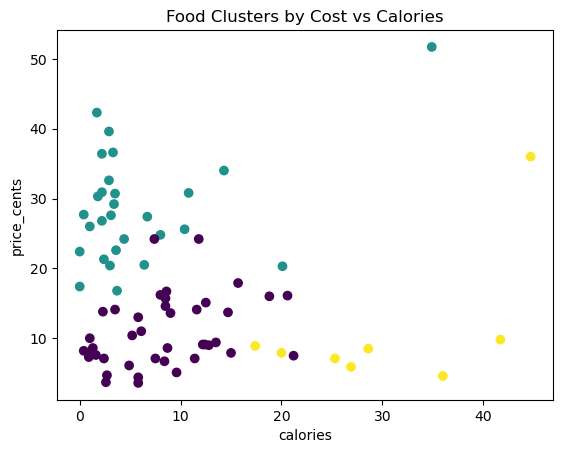

In [38]:
# 'c = df['Cluster'] ; to catagorize and color each cluster/datapoint in the plot
plt.scatter(df['calories'], df['price_cents'], c=df['Cluster'])
plt.xlabel('calories')
plt.ylabel('price_cents')
plt.title('Food Clusters by Cost vs Calories')
plt.show()

In [39]:
#Which top 10 foods are in which cluster
for i in range(3):
    print(f"\nCluster {i} Foods:")
    print(df[df['Cluster'] == i]['commodity'].head(10))  # top 10 foods per cluster


Cluster 0 Foods:
1                    Macaroni
2     Wheat Cereal (Enriched)
3                 Corn Flakes
6                        Rice
8      White Bread (Enriched)
9           Whole Wheat Bread
10                  Rye Bread
12              Soda Crackers
13                       Milk
14      Evaporated Milk (can)
Name: commodity, dtype: object

Cluster 1 Foods:
11       Pound Cake
15           Butter
17             Eggs
22           Crisco
24    Sirloin Steak
25      Round Steak
26        Rib Roast
27      Chuck Roast
29     Liver (Beef)
30      Leg of Lamb
Name: commodity, dtype: object

Cluster 2 Foods:
0     Wheat Flour (Enriched)
4                  Corn Meal
5               Hominy Grits
7                Rolled Oats
23                      Lard
66               Peas, Dried
67         Lima Beans, Dried
68         Navy Beans, Dried
Name: commodity, dtype: object


In [41]:

# User input CLI
cal = float(input("Enter Calories: "))
prot = float(input("Enter Protein (g): "))
fat = float(input("Enter Fat (g): "))
cost = float(input("Enter Cost ($): "))

# Format and scale
user_data = np.array([[cal, prot, fat, cost]])
#creates a DataFrame for user_data
df1 = pd.DataFrame(user_data)
#Standardization of 'user_data' data
scaler1 = StandardScaler()
user_scaled = scaler1.fit_transform(df1)

# Predict cluster
cluster = kmeans.predict(user_data)[0]

cluster_labels = {
    0: "Low Cost & Balanced",
    1: "High Protein & Expensive",
    2: "High Calorie & Low Protein ; Medium to low cost"
}
print(f"\nThis meal is classified as: {cluster_labels[cluster]}")



This meal is classified as: High Calorie & Low Protein ; Medium to low cost
